# Predicting Severity of Impact from Conflict Events in Kenya

## Group_3: Capstone Project

### Authors:
    Endalkachew Dessalegne
    James Gatonye
    Danton Kipngen
    Noel Seda
    Zeena Karariu
   

## 1. Project Overview

## 1.1. Business Understanding 
### 1.1.1 Business Problem 


In recent years, Kenya has experienced frequent demonstrations driven by political, social, and economic factors. These events often escalate rapidly and impact surrounding communities in varying degrees-from minimal disruption to full-blown humanitarian emergencies. Currently, decision-makers such as government agencies, humanitarian organizations, and peacekeeping forces lack effective real-time tools to predict how severe the consequences of such events might be. Without timely insight into the potential impact, it becomes difficult to coordinate an appropriate and rapid response.
This project aims to build a predictive model that assesses the severity level of conflict events-categorized as low, moderate, high, or critical-to help stakeholders allocate emergency resources proportionally and respond faster to unfolding crises.

### 1.1.2. Objectives

The primary objective of this project is to build a predictive model that classifies conflict events in Kenya into four severity levels—Low, Moderate, High, and Critical—based on historical data from the Armed Conflict Location & Event Data Project (ACLED).

This model will aid stakeholders such as humanitarian agencies, emergency responders, government bodies, and peacebuilding organizations to:

- Predict the likely severity of emerging or recent conflict events using structured event data.

- Prioritize response efforts to areas or events that are likely to have a higher community impact.

- Inform proactive planning and policy-making using insights from past trends and geospatial patterns of conflict severity.

- Allocate limited emergency and humanitarian resources more efficiently by understanding the spatial and temporal distribution of severe conflict events.

#### Specific Project Goals
- Engineer a Community Impact Score (CIS) from historical ACLED data using variables such as fatalities, event type, civilian targeting, and narrative descriptions.

- Map the CIS to a categorical severity label: Low, Moderate, High, or Critical.

- Train and evaluate multiple multi-class classification models using both numerical and categorical event features.

- Visualize and interpret feature importance to understand the key drivers of conflict severity.

## 2. Data Understanding

This project uses data from the Armed Conflict Location & Event Data Project (ACLED), which provides detailed records of conflict-related events across Africa. The raw dataset includes over 431,000 records spanning from 1997 to 2025, with events reported in multiple countries. Since the project focuses on understanding and predicting conflict severity within Kenya, we extract and analyze only events that occurred in Kenya.

### 2.1. Data Source
- Dataset: ACLED Africa Curated Data

- Time Period: 1997–2025

- Geographic Scope: Africa

- Download Source: https://acleddata.com/

- Format: CSV

- Size: ~431.2 K rows × 31 columns


### 2.2. Load Dataset

In [1]:
# import pandas 
import pandas as pd

# Load Africa dataset
df = pd.read_csv("Africa_1997-2025_Jun27.csv")

# View shape and sample rows
print (f"Number of rows: {df.shape[0]}")
print (f"Number of columns: {df.shape[1]}")
df.head()


Number of rows: 431277
Number of columns: 31


,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,ANG4195,2025-06-27,2025,1,Demonstrations,Protests,Peaceful protest,Protesters (Angola),MEA: Movement of Angolan Students; Students (A...,Protesters,...,Luanda,-8.8383,13.2344,1,24 Horas; A Semana,National-International,"On 27 June 2025, students supported by the Mov...",0,crowd size=no report,1751322203
1,BFO14070,2025-06-27,2025,1,Political violence,Battles,Armed clash,JNIM: Group for Support of Islam and Muslims,NaN,Rebel group,...,Vaongo,11.1761,-0.0850,1,Signal,New media,"On 27 June 2025, an armed group (likely JNIM m...",0,NaN,1751322204
2,BFO14071,2025-06-27,2025,1,Political violence,Battles,Armed clash,JNIM: Group for Support of Islam and Muslims,NaN,Rebel group,...,Diabo,12.0166,-0.0333,1,Signal,New media,"On 27 June 2025, JNIM militants ambushed a pat...",10,NaN,1751322204
3,BFO14072,2025-06-27,2025,1,Political violence,Battles,Armed clash,JNIM: Group for Support of Islam and Muslims,NaN,Rebel group,...,Anago,11.1876,-0.1063,1,Signal,New media,"On 27 June 2025, an armed group (likely JNIM m...",0,NaN,1751322204
4,BFO14073,2025-06-27,2025,1,Political violence,Explosions/Remote violence,Remote explosive/landmine/IED,JNIM: Group for Support of Islam and Muslims,NaN,Rebel group,...,Namssiguia,13.8317,-1.6082,2,Al Zallaqa,New media,"On 27 June 2025, JNIM claimed to have targeted...",0,NaN,1751322204


In [2]:
# Check the number and list of countries included
df['country'].nunique(), df['country'].unique() 

(58,
 array(['Angola', 'Burkina Faso', 'Cameroon', 'Cape Verde',
        'Democratic Republic of Congo', 'Libya', 'Mauritania', 'Mali',
        'Morocco', 'Mauritius', 'Mozambique', 'Nigeria', 'South Africa',
        'Somalia', 'Sudan', 'Tunisia', 'Ethiopia', 'Ghana', 'Malawi',
        'South Sudan', 'Togo', 'Uganda', 'Kenya', 'Niger', 'Senegal',
        'eSwatini', 'Egypt', 'Guinea-Bissau', 'Namibia', 'Benin',
        'Ivory Coast', 'Guinea', 'Reunion', 'Central African Republic',
        'Tanzania', 'Chad', 'Liberia', 'Madagascar', 'Rwanda', 'Eritrea',
        'Algeria', 'Burundi', 'Lesotho', 'Zambia', 'Zimbabwe', 'Mayotte',
        'Comoros', 'Botswana', 'Republic of Congo', 'Gabon', 'Gambia',
        'Sao Tome and Principe', 'Sierra Leone',
        'British Indian Ocean Territory', 'Djibouti', 'Seychelles',
        'Equatorial Guinea',
        'Saint Helena, Ascension and Tristan da Cunha'], dtype=object))

#### 2.3. Filtering Kenya Data

In [3]:
# Creating dataset for Kenya conflict events 
df_kenya = df[df["country"] == "Kenya"].copy()

# Confirming shape and preview
#shape of df_kenya - number of rows and columns
print (f"Number of rows: {df_kenya.shape[0]}")
print (f"Number of columns: {df_kenya.shape[1]}") 
df_kenya.head()

Number of rows: 17812
Number of columns: 31


,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
176,KEN18284,2025-06-25,2025,1,Strategic developments,Strategic developments,Change to group/activity,Police Forces of Kenya (2022-),NaN,State forces,...,Nairobi - Starehe,-1.2881,36.8236,1,Citizen (Kenya); Daily Nation (Kenya); Ghetto ...,New media-Subnational,"Security measures: On 25 June 2025, police off...",0,NaN,1751322259
177,KEN18288,2025-06-25,2025,1,Strategic developments,Strategic developments,Change to group/activity,Police Forces of Kenya (2022-),NaN,State forces,...,Mlolongo,-1.3964,36.9403,1,Star (Kenya),National,"Security measures: On 25 June 2025, police off...",0,NaN,1751322259
178,KEN18289,2025-06-25,2025,1,Strategic developments,Strategic developments,Change to group/activity,Police Forces of Kenya (2022-),NaN,State forces,...,Kitengela,-1.4761,36.9614,1,Star (Kenya),National,"Security measures: On 25 June 2025, police off...",0,NaN,1751322259
179,KEN18290,2025-06-25,2025,1,Strategic developments,Strategic developments,Change to group/activity,Police Forces of Kenya (2022-),NaN,State forces,...,Mombasa,-4.0547,39.6636,1,Kenya Standard; Star (Kenya),National,"Security measures: On 25 June 2025, police off...",0,NaN,1751322259
180,KEN18291,2025-06-25,2025,1,Demonstrations,Riots,Violent demonstration,Rioters (Kenya),Independent Politicians (Kenya); Judges (Kenya),Rioters,...,Nairobi - Starehe,-1.2881,36.8236,1,Al Jazeera; Citizen (Kenya); CNN; Daily Nation...,New media-Subnational,"On 25 June 2025, thousands of residents, mainl...",0,crowd size=thousands,1751322259


### 2.4. Structure of the Dataset

In [4]:
# check summary of df structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431277 entries, 0 to 431276
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   event_id_cnty       431277 non-null  object 
 1   event_date          431277 non-null  object 
 2   year                431277 non-null  int64  
 3   time_precision      431277 non-null  int64  
 4   disorder_type       431277 non-null  object 
 5   event_type          431277 non-null  object 
 6   sub_event_type      431277 non-null  object 
 7   actor1              431277 non-null  object 
 8   assoc_actor_1       120393 non-null  object 
 9   inter1              431277 non-null  object 
 10  actor2              314459 non-null  object 
 11  assoc_actor_2       89836 non-null   object 
 12  inter2              314461 non-null  object 
 13  interaction         431277 non-null  object 
 14  civilian_targeting  128120 non-null  object 
 15  iso                 431277 non-nul

* Data has object, integer and float datatypes
* Each row in the dataset represents a single conflict or demonstration event, with the following types of features:

| Column Name         | Description                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| `event_id_cnty`     | Unique event identifier with embedded country code                          |
| `event_date`        | Date of event occurrence                                                    |
| `year`              | Year in which the event occurred                                            |
| `time_precision`    | Precision of the time information (e.g., day, week, month)                  |
| `disorder_type`     | Target variable: type of disorder (e.g., battle, protest, riot, etc.)       |
| `event_type`        | Main category of the event                                                  |
| `sub_event_type`    | More specific classification within event type                              |
| `actor1`            | Primary actor involved                                                      |
| `assoc_actor_1`     | Associated group with actor1                                                |
| `inter1`            | Interaction code for actor1                                                 |
| `actor2`            | Secondary actor                                                             |
| `assoc_actor_2`     | Associated group with actor2                                                |
| `inter2`            | Interaction code for actor2                                                 |
| `interaction`       | Combined interaction type                                                   |
| `civilian_targeting`| Indicates whether civilians were targeted                                   |
| `iso`               | ISO country code                                                            |
| `region`            | Region of Africa                                                            |
| `country`           | Country name                                                                |
| `admin1`            | First-level administrative division (e.g., state/province)                  |
| `admin2`            | Second-level administrative division                                        |
| `admin3`            | Third-level administrative division                                         |
| `location`          | Specific location name                                                      |
| `latitude`          | Geographic latitude                                                         |
| `longitude`         | Geographic longitude                                                        |
| `geo_precision`     | Precision of the geographic coordinates                                     |
| `source`            | Source organization of the report                                           |
| `source_scale`      | Scale of source reporting                                                   |
| `notes`             | Detailed narrative text describing the event                                |
| `fatalities`        | Number of people killed                                                     |
| `tags`              | Keywords or labels for the event                                            |
| `timestamp`         | Time when the event data was entered                                       |



### 2.5. Missing Values

In [5]:
# Checking for missing values
df_kenya.isnull().sum()

event_id_cnty             0
event_date                0
year                      0
time_precision            0
disorder_type             0
event_type                0
sub_event_type            0
actor1                    0
assoc_actor_1         10057
inter1                    0
actor2                 6789
assoc_actor_2         14229
inter2                 6789
interaction               0
civilian_targeting    12413
iso                       0
region                    0
country                   0
admin1                    0
admin2                    0
admin3                 1306
location                  0
latitude                  0
longitude                 0
geo_precision             0
source                    0
source_scale              0
notes                     0
fatalities                0
tags                   9758
timestamp                 0
dtype: int64

* There are 7 columns with missing values

## 3. Data preparation
Before building a predictive model, it is essential to prepare the dataset by cleaning, transforming, and engineering relevant features that contribute to the prediction of conflict event severity. The following data preparation steps were applied to the Kenya-specific dataset derived from ACLED Africa data.


### 3.1. Handling Missing Values
To retain valuable features and avoid unnecessary row deletions:
- assoc_actor_1, assoc_actor_2, actor2, inter2: missing values are imputed with 'unknown' not to lose data by droping them

- civilian_targeting: filled missing entries with "None" to preserve logical checks in feature engineering.

- admin3: missing values were imputed with values from 'admin2' - a higher adminstration level

In [6]:
# to deal with multiple columns, we use pipeline function
# list of columns to be filled with 'unknown'
columns_to_fill = ['assoc_actor_1', 'assoc_actor_2', 'actor2', 'inter2']

# create function 
def fill_missing_values(df):
    for col in columns_to_fill:
        df[col] = df[col].fillna('unknown')
    return df 
df_kenya = fill_missing_values(df_kenya) 

#other columns are dealt with differently 
df_kenya['civilian_targeting'] = df_kenya['civilian_targeting'].fillna('None') 
df_kenya['admin3'] = df_kenya['admin3'].fillna(df_kenya['admin2']) 

### 3.2. Dropping Irrelevant Columns
We drop columns that do not contribute directly to the classification task. These included:

- Identifiers or redundant geographic levels: event_id_cnty, iso, region, country, admin2 

- Source-related metadata: geo_precision, source, source_scale, timestamp, tags

In [7]:
columns_to_drop = [
    'event_id_cnty', 'iso', 'region', 'country', 'admin2', 'geo_precision', 
    'source', 'source_scale', 'timestamp', 'tags'
]
df_kenya.drop(columns=columns_to_drop, inplace=True)

In [8]:
# check if missing values are dealt with
df_kenya.isnull().sum() 

event_date            0
year                  0
time_precision        0
disorder_type         0
event_type            0
sub_event_type        0
actor1                0
assoc_actor_1         0
inter1                0
actor2                0
assoc_actor_2         0
inter2                0
interaction           0
civilian_targeting    0
admin1                0
admin3                0
location              0
latitude              0
longitude             0
notes                 0
fatalities            0
dtype: int64

### 3.3. Text data cleaning 
* Columns with text categorical data consist of unwanted numbers and numbers in parenthesis- these are removed
* text is converted to lowercase and whitespaces are removed

In [9]:
# import regular expression library
import re

text_columns = ['disorder_type', 'event_type', 'sub_event_type', 'actor1', 'assoc_actor_1','inter1', 'actor2',
                            'assoc_actor_2', 'inter2', 'interaction', 'civilian_targeting', 'admin1', 'admin3', 'location', 'notes']
# cleaning function
def clean_data(text):
    # remove anything in parentheses
    text = re.sub(r'\(.*?\)', '', text)
    # lowercase and whitespace
    return text.lower().strip()

# we apply the function to multiple columns to be cleaned  
def clean_columns(df, columns):
    for col in columns:
        df[col] = df[col].astype(str).apply(clean_data)
    return df
df_kenya = clean_columns(df_kenya, text_columns) 

### 3.4. Feature Engineering
We feature engineer new columns by combining two columns together:
* 'actor1' and 'assoc_actor_1' - feature engineer **'primary_actor'** column
* 'actor2' and 'assoc_actor_2' - feature engineer **'secondary_actor'** column


In [10]:
# we combine the two columns
def combine_actors_from_row(row, col1, col2):
    a1, a2 = row[col1], row[col2]
    actors = [actor for actor in [a1, a2] if actor != "unknown"]
    if not actors:
        return "unknown"
    # remove from duplicated same actor names and return only one
    return '; '.join(sorted(set(actors)))

df_kenya['primary_actor'] = df_kenya.apply(lambda row: combine_actors_from_row(row, 'actor1', 'assoc_actor_1'),
    axis=1)
df_kenya['secondary_actor'] = df_kenya.apply(lambda row: combine_actors_from_row(row, 'actor2', 'assoc_actor_2'),
    axis=1)

In [11]:
# examine the new column added 
df_kenya['primary_actor'].value_counts().head()

primary_actor
protesters                  2473
rioters                     1625
police forces of kenya      1474
rioters; vigilante group    1455
unidentified armed group    1383
Name: count, dtype: int64

In [12]:
# examine the new column added 
df_kenya['secondary_actor'].value_counts().head()

secondary_actor
unknown                   6789
civilians                 3209
police forces of kenya    2466
al shabaab                 256
civilians; labor group     255
Name: count, dtype: int64

### 3.4.1.  Group Rare Actor into "other" 
* Grouping 'primary_actor'and 'secondary_actor'variables which are rare under "other" group helps to simplify modeling and reduces sparsity
* This helps for encoding categorical variables with low-frequncy

In [13]:
def group_rare_categories(df, column, threshold):
    # Count frequency
    value_counts = df[column].value_counts()
    # Identify rare values
    rare_categories = value_counts[value_counts < threshold].index
    # Replace rare values with 'other'
    df[column] = df[column].apply(lambda x: 'other' if x in rare_categories else x)
    return df


In [14]:
# Set frequency threshold (e.g., 100 events)
threshold = 50

# Apply function
df_kenya = group_rare_categories(df_kenya, 'primary_actor', threshold)
df_kenya = group_rare_categories(df_kenya, 'secondary_actor', threshold) 

### 3.4.2. Feature engineering the Target variable - 'severity_level'
**Community Impact Score (CIS)**  
We engineered a Community Impact Score (CIS) to reflect the magnitude and societal consequence of each event using available structured and unstructured data. This was then mapped to a Severity Level.

The CIS is a composite score derived as follows:

- Fatalities: Weighted score (×2)

- Civilian Targeting: Adds 5 if civilians were explicitly targeted

- Event Type: Adds 5 if event is among 'Battles', 'Violence against civilians', 'Explosions/Remote violence'

- Narrative Cues: Adds 5 if keywords like "displacement" or "burnt" are found in the notes

- Narrative Length: Additional points based on text length (divided by 1000)

In [15]:
# create function for scoring impact based on features
def community_impact_score(row):
    score = 0
    score += row['fatalities'] * 2
    
    if row['civilian_targeting'] == 'civilian targeting':
        score += 5
    
    if row['event_type'] in ['violence against civilians', 'battles', 'explosions/remote violence']:
        score += 5
    
    if 'displacement' in row['notes'] or 'burnt' in row['notes']:
        score += 5
    
    score += len(row['notes']) / 1000  # Normalize narrative length contribution
    return score

df_kenya['community_impact_score'] = df_kenya.apply(community_impact_score, axis=1)


#### 3.4.3. Severity Level Categorization
CIS values were binned into four severity levels:

- Low: Score ≤ 2

- Moderate: 3 < Score ≤ 8

- High: 6 < Score ≤ 14

- Critical: Score > 14

In [16]:
# create function to categorize impact score in to 4 severity levels
def severity_level(score):
    if score <= 2:
        return "Low"
    elif score <= 8:
        return "Moderate"
    elif score <= 14:
        return "High"
    else:
        return "Critical"
# create new column 'severity_level' base on the score
df_kenya['severity_level'] = df_kenya['community_impact_score'].apply(severity_level)

### 3.5. Class Distribution of Target Variable
- we examined the class distribution of the target variable:

In [17]:
df_kenya['severity_level'].value_counts()

severity_level
Low         9605
Moderate    3667
High        3209
Critical    1331
Name: count, dtype: int64

- It shows some class imbalance which we will address before modeling

### 3.6. Date Parsing

In [18]:
# we convert string 'event_date' into datetime 
df_kenya['event_date'] = pd.to_datetime(df_kenya['event_date'])
df_kenya['year'] = df_kenya['event_date'].dt.year
df_kenya['month'] = df_kenya['event_date'].dt.month 

- This will add 'year' and 'month' columns to the dataframe 

## 4. Exploratory Data Analysis

This section explores patterns, distributions, and relationships in the Kenya-specific conflict dataset. Our goals are to understand temporal and spatial trends, identify drivers of severity, and assess class distributions especially how the severity_level varies by year, event_type, and location.

We’ll use the following Python libraries:

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

### 4.1. Severity Level Distribution
Understanding the frequency of each severity level helps assess class imbalance.

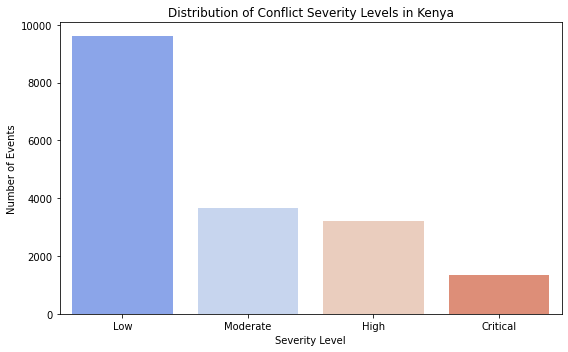

In [20]:
# Plot severity level counts
plt.figure(figsize=(8, 5))
sns.countplot(x='severity_level', hue='severity_level',data=df_kenya, order=['Low', 'Moderate', 'High', 'Critical'], palette='coolwarm')
plt.title('Distribution of Conflict Severity Levels in Kenya')
plt.xlabel('Severity Level')
plt.ylabel('Number of Events')
plt.tight_layout()
plt.show()

- The majority of events are classified as Low severity.

- Critical and High severity events still form a substantial portion, indicating a significant number of events are with major impact.

- Class distribution is imbalanced, but not severely skewed, which is manageable in classification modeling.

### 4.2. Severity Over Time
Analyze how severity levels trend over the years (1997–2025). This helps us assess if political instability or violence has increased or decreased over time.

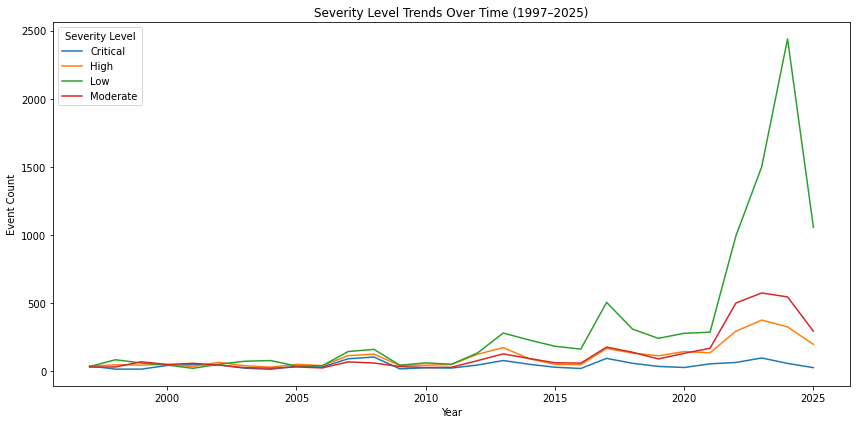

In [21]:
# Group by year and severity
year_severity = df_kenya.groupby(['year', 'severity_level']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=year_severity, x='year', y='count', hue='severity_level', palette='tab10')
plt.title('Severity Level Trends Over Time (1997–2025)')
plt.xlabel('Year')
plt.ylabel('Event Count')
plt.legend(title='Severity Level')
plt.tight_layout()
plt.show()

- Fluctuations in the frequency of severe events align with Kenya’s political cycles and historical unrest periods (e.g., elections, economic crises).

- Peaks observed during election years (2007, 2017, 2022) show increased high and critical events.

- Suggests strong temporal correlation between political timelines and conflict severity.



### 4.3. Event Type vs. Severity Level
See how different types of conflict events relate to severity.

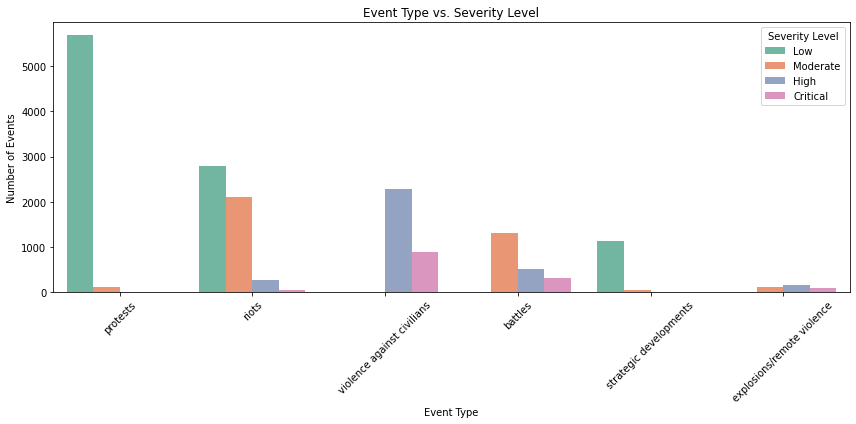

In [22]:
# Plot event type vs severity
plt.figure(figsize=(12, 6))
sns.countplot(data=df_kenya, x='event_type', hue='severity_level', order=df_kenya['event_type'].value_counts().index, palette='Set2')
plt.title('Event Type vs. Severity Level')
plt.xlabel('Event Type')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.legend(title='Severity Level')
plt.tight_layout()
plt.show()

- Violence against civilians and Battles contribute disproportionately to High and Critical severity categories.

- Protests and Strategic developments are mostly Low severity, with fewer extreme outcomes.

- This supports the weightings used in engineering the Community Impact Score.


### 4.4. Geographic Distribution of Severity (Map)
We’ll use Plotly for an interactive scatter map showing where critical and high severity events tend to cluster geographically.

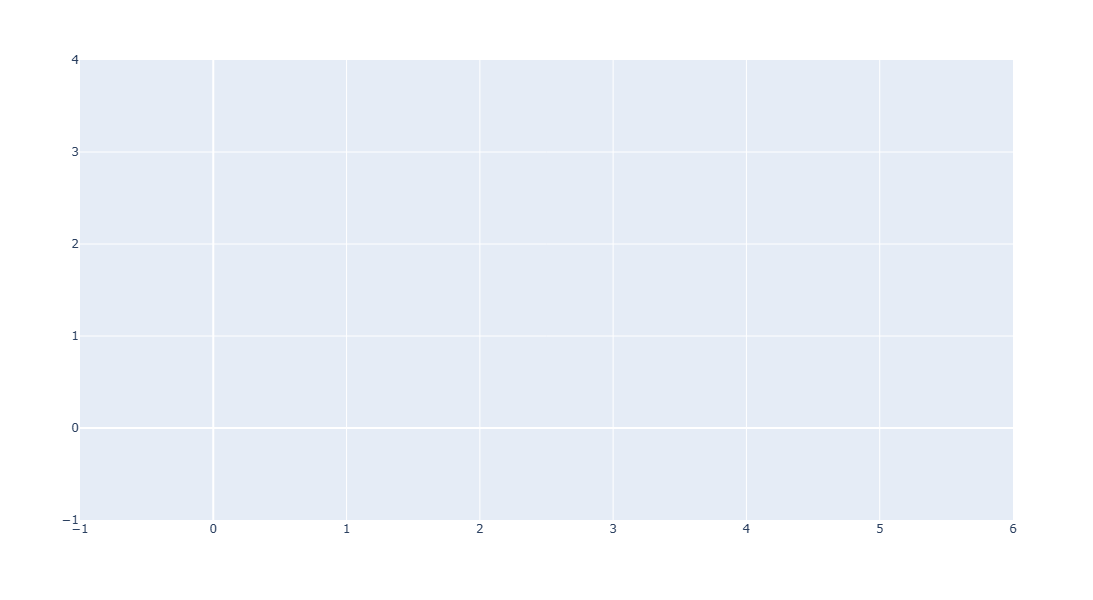

In [36]:
import plotly.express as px

fig = px.scatter_map(
    df_kenya,
    lat='latitude',
    lon='longitude',
    hover_name='location',
    hover_data=['event_type', 'severity_level', 'fatalities', 'year'],
    color='severity_level',
    color_discrete_map={
        'Low': 'blue',
        'Moderate': 'lightblue',
        'High': 'orange',
        'Critical': 'red'
    },
    zoom=5,
    height=600
)

# Apply styling manually via update_layout
#fig.update_layout(mapbox_style="carto-positron")
fig.show()



- High-severity events are geographically concentrated in urban centers and volatile counties (e.g., Nairobi, Kisumu, Turkana).

- Critical incidents are less dispersed, often clustered around strategic towns.

- The visualization supports targeting geographic hotspots for early warning systems.

### 4.5. Top 10 locations with most critical events

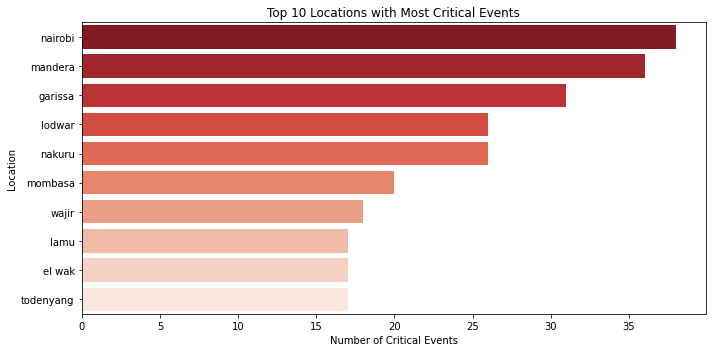

In [24]:
# Filter for Critical events
critical_locs = df_kenya[df_kenya['severity_level'] == 'Critical']

top_critical_locations = critical_locs['location'].value_counts().nlargest(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_critical_locations.values, y=top_critical_locations.index, hue=top_critical_locations.index, palette='Reds_r')
plt.title('Top 10 Locations with Most Critical Events')
plt.xlabel('Number of Critical Events')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

- Nairobi, Mandera, and Garissa top the list, reinforcing their roles as centers of tension.


### 4.6. Fatalities by Event Type (Boxplot to detect outliers)

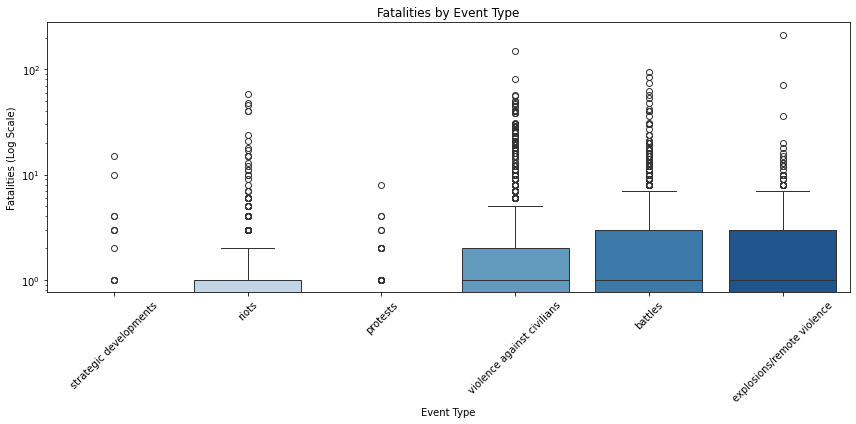

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_kenya, x='event_type', y='fatalities', hue='event_type', legend=False, palette='Blues')
plt.title('Fatalities by Event Type')
plt.yscale('log')  # log scale to handle outliers
plt.xlabel('Event Type')
plt.ylabel('Fatalities (Log Scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Events involving Battles and Explosions show extreme variation and outliers.

- Protests have consistently low fatalities.

- A log scale helped reveal patterns hidden by extreme values.

### 4.7. Top Primary Actors Involved in High/Critical-Impact Events

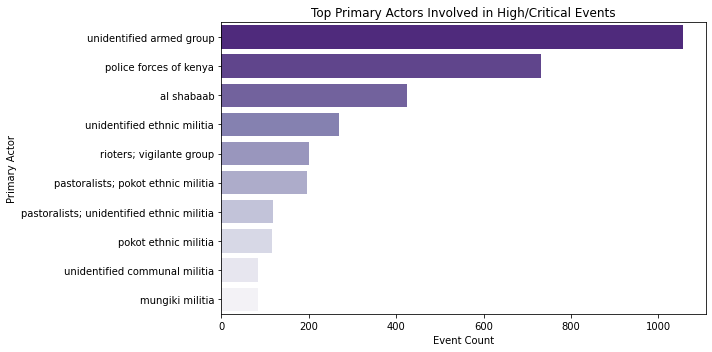

In [26]:
# Filter for high and critical severity events
high_impact = df_kenya[df_kenya['severity_level'].isin(['High', 'Critical'])]

# Exclude 'other' from primary_actor and get top 10 actors
filtered_actors = high_impact[high_impact['primary_actor'] != 'other']
top_actors = filtered_actors['primary_actor'].value_counts().nlargest(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_actors.values, y=top_actors.index, hue=top_actors.index, palette='Purples_r')
plt.title('Top Primary Actors Involved in High/Critical Events')
plt.xlabel('Event Count')
plt.ylabel('Primary Actor')
plt.tight_layout()
plt.show()

From the above we identified primary actors most frequently involved in High or Critical severity events.
- Unidentified armed group, police forces of kenya, al shabaab are the top primary actors involved in high/critical impact events
- Highlights the need for actor-level surveillance and engagement strategies.


### 4.8. Top Secondary Actors Involved in High/Critical-Impact Events

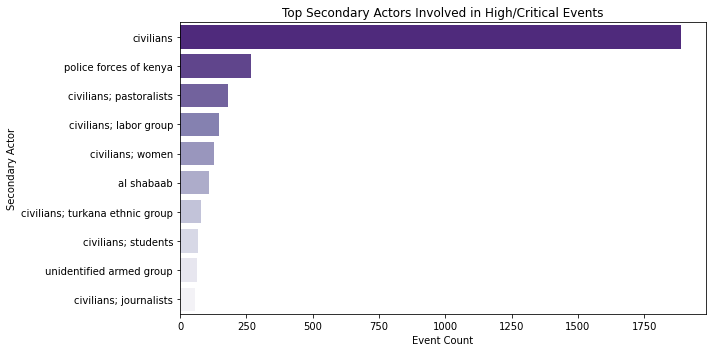

In [27]:
# Filter for high and critical
high_impact2 = df_kenya[df_kenya['severity_level'].isin(['High', 'Critical'])]

# Exclude 'other' from secondary_actor and get top 10 actors
filtered_actors = high_impact2[high_impact['secondary_actor'] != 'other']
top_actors2 = filtered_actors['secondary_actor'].value_counts().nlargest(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_actors2.values, y=top_actors2.index, hue=top_actors.index, legend=False, palette='Purples_r')
plt.title('Top Secondary Actors Involved in High/Critical Events')
plt.xlabel('Event Count')
plt.ylabel('Secondary Actor')
plt.tight_layout()
plt.show()

From the above we identified secondary actors most frequently involved in High or Critical severity events.
- Civilians, police forces of Kenya, pastoralists are among the top secondary actors involved in high/critical impact events


### 4.9. Fatalities by Location

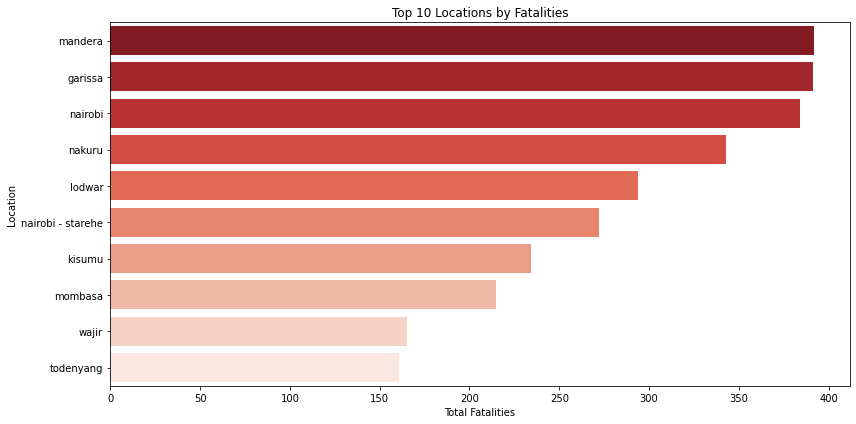

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# group by location and sum fatalities
fatalities_by_location = df_kenya.groupby('location')['fatalities'].sum().sort_values(ascending=False)

# Plot top 10 locations with highest fatalities
top_locations = fatalities_by_location.head(10).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=top_locations, x='fatalities', y='location', hue='location', palette='Reds_r')
plt.title('Top 10 Locations by Fatalities')
plt.xlabel('Total Fatalities')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


- Mandera, Garissa, Nairobi are among the locations where total fatalities due to conflict events is the highest
- This shows how locations corelate in terms of number of fatalities and severity levels

## 5.  Modeling 

## 5.1. Preprocessing before Modeling
### 5.1.1. Feature Selection and Transformation 
- Features which are used to feature engineer 'severity_level' are not used as predictors to avoid data leakage
- Our model will be designed for early warning or real-time prediction of 'severity_level'(pre-event or during-event), thus features which can be known before or during an event are used.

In [29]:
# define features
categorical_features = ['sub_event_type', 'disorder_type', 'primary_actor', 'secondary_actor',
                        'interaction', 'admin1', 'admin3', 'location']
numerical_features = ['year', 'time_precision', 'latitude', 'longitude', 'month']

# all features - predictors
all_features = categorical_features + numerical_features


### 5.1.2. Train-Test Split
- We are predicting 'severity_level', so it is our target variable 
- X : assigned to features or predictors
- y : assigned to target variable

- Split the data into training and testing sets (80/20) using stratified sampling to preserve class proportions.

In [30]:
from sklearn.model_selection import train_test_split

# asign variables X and y to predictor features and target variable respectively
X = df_kenya[all_features]
y = df_kenya['severity_level']

# Train-test split (before SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

### 5.1.3. Preprocessing and Class Imbalance 
**`ColumnTransformer`** is used to:

- Standardize numerical features using StandardScaler.
- Encode categorical features using OneHotEncoder to make them machine-readable.
- Class imbalance is addressed using SMOTE 

In [31]:
#import necessary libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from imblearn.over_sampling import SMOTE 
from sklearn.pipeline import Pipeline

# Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Fit and transform training features, transform test features
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Apply SMOTE on training data
smote = SMOTE(sampling_strategy='not majority', random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed, y_train)


ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (C:\Users\Endalk\anaconda10\envs\learn-env\lib\site-packages\sklearn\utils\metaestimators.py)

## 5.2. Baseline Model - Logestic Regression 
Logestic regression is chosen as a baseline model as it is: 
* fast, reliable and interpretable
* great for benchmarking and gives us a baseline score to measure accuracy, precision, recall, or F1.

### 5.2.1. Model Training and Prediction

* our target variable 'severity_level' is multi-class, with four categories (Low, Moderate, High, Critical)
* configure logistic regression for multi-class model using the multinomial option in scikit-learn

In [ ]:
#import necessary libraries
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
logreg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=500,
    class_weight='balanced'
)
logreg.fit(X_train_balanced, y_train_balanced)


#### 5.2.2. Prediction and Evaluation 
- Predicted the severity levels on the test set.
- 
Used classification_report to assess performance in terms of precision, recalld F1-scor and F2-scoree for each clas .

In [ ]:
from sklearn.metrics import classification_report, fbeta_score, accuracy_score

# Predict on test set
y_pred = logreg.predict(X_test_processed)

# Full classification report: includes per-class precision, recall, and F1 score
print("\nClassification Report (Logistic Regression + SMOTE):")
print(classification_report(y_test, y_pred))

### 5.2.3. Confusion Matrix(Baseline Model)

In [ ]:
# import necessary libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Low', 'Moderate', 'High', 'Critical'])

# Plot it
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Moderate', 'High', 'Critical'],
            yticklabels=['Low', 'Moderate', 'High', 'Critical'])

plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted Severity')
plt.ylabel('Actual Severity')
plt.tight_layout()
plt.show()


* It has overall accuracy of 83%
* Low Severity has excellent precision whereas Critical Severity shows lower precision
* Moderate & Low severity classes have strong recall — most actual Moderate and Low cases were correctly identified.
* Critical Class Recall is weak — the model missed several real Critical events, predicting them as High or Moderate (i.e., false negatives).
* The model predicted some Moderate or High events as Critical when they weren’t(false Positives) — leading to over-response risk.
* True Critical events were misclassified as High or Moderate(False Negatives) — which poses risk for unproportional response.

## 5.3 Random Forest Model

We use this model to get impoved performance because it is: 
- known to handle noisy or imbalanced data well.
- Learns interactions between features (eg. actor + location).

### 5.3.1 Model Training 
- Chose RandomForestClassifier with:

 n_estimators=150 for more stable predictions and class_weight='balanced' to handle class imbalance across severity levels.
 - Trained the model on the training set.

- Predicted the severity levels on the test set.

In [ ]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=150,
    class_weight='balanced',   # handles class imbalance
    random_state=42
)

# Fit the model
rf_model.fit(X_train_balanced, y_train_balanced)


### 5.3.2. Prediction and Evaluation 
- Predicted the severity levels on the test set.
- Used classification_report to assess performance in terms of precision, recall, and F1-score for each class.

In [ ]:
# Predict and evaluate
y_pred = rf_model.predict(X_test_processed) 
print("\n Classification Report (Random Forest):")
print(classification_report(y_test, y_pred))

### 5.3.3. Confusion Matrix (Random Forest)

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Low', 'Moderate', 'High', 'Critical'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Moderate', 'High', 'Critical'],
            yticklabels=['Low', 'Moderate', 'High', 'Critical'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Severity Level Confusion Matrix')
plt.show()


- Low severity has high precision - most predicted “Low” events are truly low 
- Moderate & High show balanced precision but some misclassification between each other.
- Critical precision is low - many predicted “Critical” cases are actually Moderate or High, inflating false positives
- Low recall is excellent - almost all true low events are captured.
- Most moderate events were correctly flagged.
- Some High events misclassified as Moderate or Critical.
- Critical recall is weak- many true Critical events are predicted as High or Moderate (high false negatives)

## 5.4. XGBoost Model
To improve upon the baseline model, we implemented an XGBoost classifier, a powerful gradient boosting algorithm known for its performance on structured and imbalanced data. By reusing the same preprocessed features from the Logistic regression model, we configured XGBoost for multiclass classification with four 'severity_level' categories. The model was trained using 200 trees, a moderate learning rate, and regularization techniques (such as subsampling and column sampling) to prevent overfitting. XGBoost’s ability to sequentially correct errors from previous trees allows it to better capture complex relationships within the data. 

### 5.4.1. Transform classes into numerical values

XGBoost with objective='multi:softmax' needs the target values (y) to be integers, not strings like "Low" or "Critical".
This cell transforms the classes into numbers automatically:

- 'Low' = 0

- 'Moderate' = 1

- 'High' = 2

- 'Critical' = 3

### 5.4.2. Model Training 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_balanced)
y_test_encoded = label_encoder.transform(y_test)


In [ ]:
# impoert necessary library
from xgboost import XGBClassifier

# Initialize XGBoost for multi-class severity prediction
xgb_model = XGBClassifier(
    objective='multi:softmax',   # for multiclass classification
    num_class=4,                 # Low, Moderate, High, Critical
    eval_metric='mlogloss',     # log loss for multiclass
    n_estimators=200,           # number of boosting rounds
    learning_rate=0.1,          # step size shrinkage
    max_depth=6,                # complexity control
    subsample=0.8,              # subsample ratio of training instances
    colsample_bytree=0.8,       # subsample ratio of columns per tree
    random_state=42
)

# Fit and train the model
xgb_model.fit(X_train_balanced, y_train_encoded)

### 5.4.3. Prediction and Evaluation 
- Since we encoded the labels to train the model, we now decode them back to readable strings ('Low', 'High', etc.) for evaluation.
- We then went ahead and did evaluation with precision, recall, and F1-score per class

In [ ]:
# predict on test set
y_pred_encoded = xgb_model.predict(X_test_processed) 

#decode back to readable strings
y_pred = label_encoder.inverse_transform(y_pred_encoded)


In [ ]:
#import library
from sklearn.metrics import classification_report 

print("\n Classification Report (XGBoost):")
print(classification_report(y_test, y_pred))


### 5.4.4. Confusion Matrix (XGBoost)

In [ ]:
# Generate confusion matrix using decoded labels
cm = confusion_matrix(y_test, y_pred, labels=label_encoder.classes_)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)

plt.title("XGBoost: Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


From the results we can observe that: 
- Accuracy: 86% (same as Random Forest)

- Macro Avg F1-score: 75%

- Weighted Avg F1-score: 86%
- Low severity shows high precision and Moderate predictions are fairly clean
- High severity has moderate precision and Critical class suffers from low precision — predictions for "Critical" sometimes include Moderate or High cases (false positives).
- Low recall is excellent — nearly all real Low events were caught correctly.
- Moderate recall is strong and High recall is moderate
- Critical recall is weak — many true Critical events were predicted as High or Moderate (false negatives).

### 5.4.5. Feature Importance (XGBoost)

In [ ]:

# access OneHotEncoder from fitted ColumnTransformer
encoder = preprocessor.named_transformers_['cat']

# check if the encoder has the expected method
try:
    onehot_feature_names = encoder.get_feature_names_out(categorical_features)
except AttributeError:
    # fallback if get_feature_names_out() is unavailable
    onehot_feature_names = encoder.get_feature_names(categorical_features)

# combine with numerical features
all_feature_names = numerical_features + list(onehot_feature_names)

# create series for feature importances
feat_importance = pd.Series(xgb_model.feature_importances_, index=all_feature_names)

# sort and plot top 20
top_features = feat_importance.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='darkgreen')
plt.title("XGBoost Feature Importance: Top 20 Features")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show() 


- Disorder type, sub-event nature, and actor interactions are among the top features which significantly influence severity predictions


## 5.5. Ensemble Model

Implemented an ensemble model to combine the strengths of three individual classifiers - the Logistic Regression, Random Forest, and XGBoost using the stacking Classifier from scikit-learn.

While each individual model has its advantages:

- Logistic Regression is fast, interpretable, and works well with linearly separable data.

- Random Forest captures nonlinear interactions and is robust to overfitting.

- XGBoost is optimized for performance and handles complex relationships with regularization.

By combining predictions from these models, the Voting Ensemble:
- Averages out individual model biases and variances.
- Aggregates predictions, leading to more stable outputs.
- Improves generalization across unseen data and varying event types.
- Leverages majority vote logic to improve robustness and reduce misclassifications.


### 5.5.1. Model Training

In [ ]:
!pip install --upgrade xgboost

In [ ]:
# import necessary libraries
from sklearn.ensemble import VotingClassifier

# Define base learners
base_learners = [
    ('logreg', logreg),
    ('rf', rf_model),
    ('xgb', xgb_model)
]

# Voting model
voting_model = VotingClassifier(
    estimators=base_learners,
    # Used hard voting, where each base model casts a vote for its predicted class.
    voting='hard',     
    n_jobs=1
)

# Fit voting model
voting_model.fit(X_train_balanced, y_train_balanced) 

### 5.5.2. Prediction and Evaluation

In [ ]:
from sklearn.metrics import classification_report

#  Predict and Evaluate
y_pred_vote = voting_model.predict(X_test_processed)

print("Classification Report: Voting Ensemble")
print(classification_report(y_test, y_pred_vote))


The Ensemble voting offers better overall performance across all models tested:

- It combines the strengths of simpler (Logistic Regression) and more complex models (Random Forest, XGBoost).

- Accuracy: 86% - strong overall prediction performance across severity classes.

- Macro F1 Avg: 0.74 - solid balance across all classes despite minority imbalance.

- Weighted F1 Avg: 0.86 - dominated by strong performance on the majority class (Low).
  
- There is performance gap on 'Critical' Class. The recall score for the 'Critical' severity class are suboptimal, which hinders reliable identification of high-risk events.
  
- Since accurately identifying ‘Critical’ events is vital for timely interventions and effective resource allocation by humanitarian and government agencies, we improve the model’s sensitivity to Critical events.
 
- This optimaization is done by hyperparameter tuning for Voting Ensemble model 


### 5.6. Hyperparameter Tuning for Voting Ensemble (Critical Class Optimization) 

- Hyperparameter tuning of the voting_model is done to maximize Recall (minimize false negatives) and F2 Score (emphasizes recall more than precision)
- We introduce F2 score, which emphasizes recall more than precision, to compare with F1 score and observe how performance is improved. 


### 5.6.1. Label Encoding

In [ ]:
# Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_balanced)
y_test_encoded = label_encoder.transform(y_test)
critical_index = list(label_encoder.classes_).index("Critical")

# Custom Scorer for “Critical” Class Recall
from sklearn.metrics import make_scorer, fbeta_score

def critical_f2_score(y_true, y_pred):
    f2_scores = fbeta_score(y_true, y_pred, beta=2, average=None)
    return f2_scores[critical_index]

critical_f2 = make_scorer(critical_f2_score) 


### 5.6.2. Hyperparameter Grids

In [ ]:
param_grid_logreg = {
    'C': [0.1, 1, 10],
    'max_iter': [1000, 2000],
    'class_weight': ['balanced']
}

param_grid_rf = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}

param_grid_xgb = {
    'n_estimators': [150, 200],
    'max_depth': [4, 6],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

### 5.6.3. GridSearchCV  and Model Training

In [ ]:
from sklearn.model_selection import GridSearchCV 

# GridSearchCV for Each Base Model
grid_logreg = GridSearchCV(
    LogisticRegression(multi_class='multinomial', solver='saga', random_state=42),
    param_grid_logreg, scoring=critical_f2, cv=3, n_jobs=-1
)

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf, scoring=critical_f2, cv=3, n_jobs=-1
)

grid_xgb = GridSearchCV(
    XGBClassifier(objective='multi:softprob', num_class=4, tree_method='hist', random_state=42),
    param_grid_xgb, scoring=critical_f2, cv=3, n_jobs=-1
)

grid_logreg.fit(X_train_balanced, y_train_encoded)
grid_rf.fit(X_train_balanced, y_train_encoded)
grid_xgb.fit(X_train_balanced, y_train_encoded) 

# Soft Voting Ensemble with Best Estimators
tuned_voting_model = VotingClassifier(
    estimators=[
        ('logreg', grid_logreg.best_estimator_),
        ('rf', grid_rf.best_estimator_),
        ('xgb', grid_xgb.best_estimator_)
    ],
    voting='soft', n_jobs=-1
)

tuned_voting_model.fit(X_train_balanced, y_train_encoded)

### 5.6.4. Prediction and Evaluation 

In [ ]:
import numpy as np
# Threshold Tuning for Critical Class 
y_probs = tuned_voting_model.predict_proba(X_test_processed)
critical_probs = y_probs[:, critical_index]

# use Threshold = 0.3 
y_pred_custom = np.where(critical_probs > 0.3, critical_index, y_probs.argmax(axis=1)) 

# Classification report using adjusted predictions
print("\nClassification Report (Tuned Voting Model with Threshold=0.3):")
print(classification_report(y_test_encoded, y_pred_custom, target_names=label_encoder.classes_))

# F2-score for each class
f2_per_class = fbeta_score(y_test_encoded, y_pred_custom, beta=2, average=None)
print("\nF2 Score for Each Class:")
for idx, label in enumerate(label_encoder.classes_):
    print(f"{label}: {f2_per_class[idx]:.2f}")

# Overall metrics
f2_macro = fbeta_score(y_test_encoded, y_pred_custom, beta=2, average='macro')
f2_weighted = fbeta_score(y_test_encoded, y_pred_custom, beta=2, average='weighted')


print("\nOverall F2 Score:")

print(f"F2 Score (Macro): {f2_macro:.2f}")
print(f"F2 Score (Weighted): {f2_weighted:.2f}")


### 5.6.5. Confusion Matrix (tuned_voting_model)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_custom)

# Display the matrix with class labels from your encoder
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d')  # Use 'd' for integer formatting
plt.title("Confusion Matrix - Tuned Voting Model (Threshold = 0.3)")
plt.tight_layout()
plt.show()


- This outperforms base learners by balancing sensitivity and precision.
- Threshold tuning drastically improves recall for “Critical” class (68%) and F2 score(59%) which is grater than F1 score(49%)

- Low class prediction is nearly perfect, boosting weighted metrics.

- Overall macro F2 score improved to 0.71, with strong performance on Low and Moderate classes.
- Maintains accuracy at 83%, showing robustness despite threshold tuning.
- Some decrease in precision (0.39), indicating more false positives for Critical events.
- This is acceptable because missing a severe case is riskier than over-alerting.
  
- **This makes the 'tuned_voting_model' a robust final model for predicting the severity of conflict events in Kenya and a reliable tool for prioritizing emergency response efforts.**

## 6. Conclusions 

This project successfully demonstrated the feasibility of predicting the severity of conflict events in Kenya using historical data from the ACLED dataset. By engineering a Community Impact Score (CIS) and mapping it into four severity levels Low, Moderate, High, and Critical, the team was able to build a robust multi-class classification model. The final model, the tuned Voting Ensemble model (which ensembles Logistic Regression, Random Forest and XGBoost), which is optimaized to maximize Recall of critical impact events (minimize false negatives) achived improved recall and and F2 Score and ovarall accuracy. This model is used to predict the severity of conflict events in Kenya and can be a reliable tool for prioritizing emergency response efforts.

The analysis highlighted key drivers of event severity including event type, civilian targeting, and primary actors involved. Temporal and spatial visualizations revealed that high-impact conflict events are closely aligned with political cycles (notably elections) and are geographically concentrated in urban and historically volatile areas like Nairobi, Kisumu, and Turkana.

## 7. Recommendations

- Operational Integration for Decision-Makers
Government bodies, humanitarian agencies, and emergency response units should integrate the best-performing models (XGBoost or the Ensemble model) into early warning systems. This would enable real-time risk assessment and prioritized response to severe conflict events.

- Focus on High-Risk Locations show consistent patterns of high or critical severity events—should be prioritized in resource allocation, surveillance, and peacebuilding initiatives.

- Expand Feature Sources for Better Performance
Incorporating additional contextual features (e.g., socioeconomic indicators and social media sentiment) may improve prediction, especially for underrepresented severity classes like “Critical.”

- Addressing Class Imbalance
Despite the use of SMOTE and Hyperparameter tuning, prediction for “Critical” events remains relatively weak. Future work could explore cost-sensitive learning, focal loss, or data augmentation to improve recall for minority classes.

### 8. Deployment 
- The trained model, preprocessor and encoder are saved or exported.

In [ ]:
# Save trained Model & Preprocessor
import joblib
joblib.dump(preprocessor, 'model_preprocessor.pkl') 
joblib.dump(label_encoder, "label_encoder.pkl")
joblib.dump(voting_model, 'voting_severity_model.pkl')

- We built FastAPI locally which accepts JSON inputs and returns severity prediction.
- we tested the model locally(localhost) and inspected for its realism and consistency.
- We used Render platform to deploy it to web
- We will share API documentation with humanitarian organizations and government bodies for use.